# Sensitivity to initial conditions (aka Butterfly Effect)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1. Compare two trajectories visually

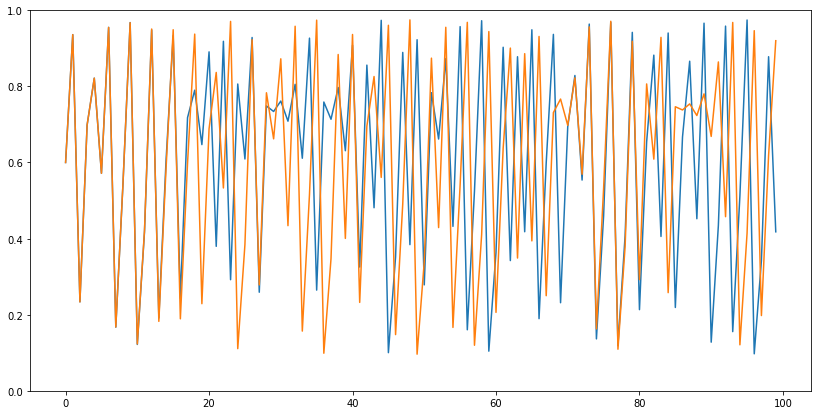

In [16]:
nsteps = 100              # Number of steps in our lil simulation
x = np.zeros(nsteps)      # Number of animals at every step
starting_points = [0.600, 0.60001]

fig = plt.figure(figsize=(14,7))
for x[0] in starting_points:
    r = 3.9                   # Rate of population change (groth - die-out?)

    for i in range(1,nsteps):
        x[i] = r*x[i-1]*(1-x[i-1])

    plt.plot(x);
plt.ylim((0,1)); # Force y axis to be between 0 and 1

### Exercise 2. Prediction horizon

Role-playing: Let's say we actually use this equation to predict something.

Q: How far in the future can we reasonably predict?

How to answer this question?

* If the question is about time, probably the answer will include a plot that has time as its horizontal axis.
* If we have a plot with time as axis, and the question is about prediction quality, then probably the vertical axis should be some kind of prediction quality.
* How to measure prediction quality? Option 1: use pairs of trajectories, calculate mean(abs(difference)) for each point in time. Option 2: use a family of trajectories; noisify (wiggle, shake?) the starting point, check how much variance it creates at each of consequtive points.

In [28]:
# 2D arrays
a = np.zeros(shape=(5,2))
a[2,0] = 888 # Addressing one element
print('Entire thingy:\n',a)
print('2nd row:',a[2,:])
print('0th column:',a[:,0])

Entire thingy:
 [[  0.   0.]
 [  0.   0.]
 [888.   0.]
 [  0.   0.]
 [  0.   0.]]
2nd row: [888.   0.]
0th column: [  0.   0. 888.   0.   0.]


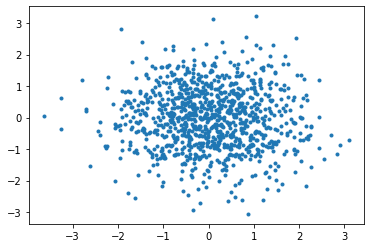

In [35]:
# A check that normal numbers generated by numpy actually look kinda normal
plt.plot(np.random.randn(1000),np.random.randn(1000),'.');
# Yep. Looks like noise should look like.

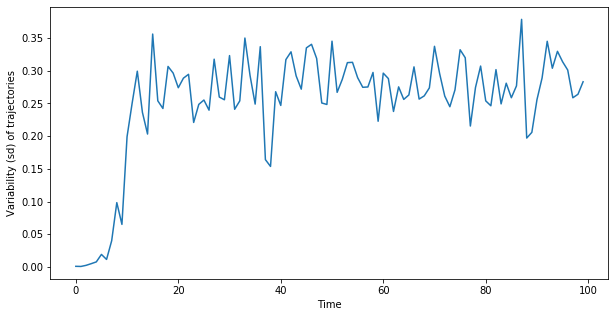

In [43]:
# Approach with a family of noisified trajectories

nsteps = 100              # Number of steps in our lil simulation
ntraces = 10
x = np.zeros(shape=(nsteps,ntraces))    # A placeholder for the trajectories we'll generate. Each will be a column.
wiggle = 0.001                          # The standard deviation of the original noise in x0

r = 3.9
for itrace in range(ntraces):
    x[0,itrace] = 0.6+np.random.randn(1)*wiggle
    for istep in range(1,nsteps):
        x[istep,itrace] = r*x[istep-1,itrace]*(1-x[istep-1,itrace])
    
#fig = plt.figure(figsize=(10,5))
#plt.plot(x)
#plt.ylim((0,1)); # Force y axis to be between 0 and 1
#plt.xlabel('Time');
#plt.ylabel('All trajectories');

fig = plt.figure(figsize=(10,5))
plt.plot(np.std(x,axis=1))
plt.xlabel('Time');
plt.ylabel('Variability (sd) of trajectories');

In [20]:
np.random.uniform()

0.8700202565663792

In [40]:
# Numpy always tries to please you:
print(np.array([1]) + np.array([1]))
print(np.array([1]) + np.array([1,2]))
print(np.array([10,20]) + np.array([1,2]))
print(np.array([10,20]) + np.array([1,2,3])) # This is the only one that it cannot generously interpret

[2]
[2 3]
[11 22]


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [33]:
starting_point = np.random.uniform() + np.array([0,0.1])
print(starting_point)

[0.40956199 0.50956199]


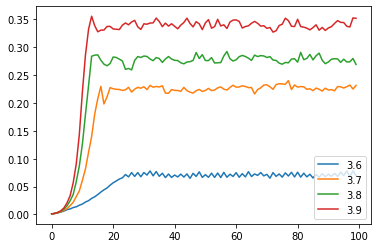

In [72]:
# Approach with pairs of trajectories

nsteps = 100
ntrials = 1000
wiggle = 0.001 # The difference between starting points in a pair

x = np.zeros(shape=(nsteps,2))              # For those 2 traces in a pair
diff = np.zeros(shape=(nsteps,ntrials))     # absolute Differences between trajectories in each pair

for r in np.arange(3.6, 4.0, 0.1):
    for itrial in range(ntrials):
        starting_point = np.random.uniform(low=0, high=1-wiggle) + np.array([0, wiggle])
        for ipair in range(2):
            x[0,ipair] = starting_point[ipair]
            for istep in range(1,nsteps):
                x[istep,ipair] = r*x[istep-1,ipair]*(1-x[istep-1,ipair])
        diff[:,itrial] = np.abs(x[:,1] - x[:,0])

    plt.plot(np.mean(diff, axis=1), label=np.round(r,decimals=2));

plt.legend(loc='lower right');